# Exploratory Data Analysis of Insomnia in Adolescence 

This project aims to analyze Insomnia in Adolescence, data that was collected as part of a larger study funded by the National Heart, Lung and Blood Institute investigating the pathophysiology of insomnia in adolescence. 

- I have used a dataset from Figshare. https://figshare.com/articles/dataset/Insomnia_in_adolescence/19214676?file=34138404 

- The report I am using to reference variables https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9411582/ 

### 1. Install and Import Neccessary Libraries 

In [87]:
#pip install pandas

In [88]:
#pip install numpy

In [89]:
#pip install matplotlib 

In [90]:
#pip install seaborn

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Exploration

In [92]:
df = pd.read_csv('insomnia/insomnia_data.csv')

In [93]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,Unnamed: 95,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,16.0,NaN,0,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,NaN,-1.413051,-1.913658,-1.015150,2.293926,1.035355589,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647679568,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806
1,sub_002,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,13.0,NaN,1,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5,5,4,8,8,15,9,14,8,81,12,10.0,26,12,13,NaN,-1.209039,-1.237831,-0.386198,1.256609,0.716262391,0.851207,1.431228,0.679165,0.915368,-1.357563,-0.252761,0.866249,-0.012113,-1.909842154,-0.766163,-1.072723,-0.91

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 174 entries, ID to ZDERS_total
dtypes: float64(92), int64(76), object(6)
memory usage: 129.3+ KB


In [95]:
# display all rows 
pd.set_option('display.max_rows', None)

#df

In [96]:
# display all columns 
pd.set_option('display.max_columns', None) 

#df

In [97]:
# Let's read-in the file with the variables dictionary 
varis = pd.read_csv('insomnia/insomnia_data_dictionary.csv')

In [98]:
varis.head()

,Group,"INSOMNIA= 1, CONTROL=0"
0,SubGroup,"clean INSOMNIA= 2, subclinical INSOMNIA = 1, C..."
1,Remote,"Remote data collection = 1, In person data col..."
2,Sex,"MALE = 1, FEMALE = 0"
3,Age,Years
4,American_Indian,race


In [99]:
varis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Group                   94 non-null     object
 1   INSOMNIA= 1, CONTROL=0  94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


### 3. Cleaning 

I want the headings to be variables (in the variable dictionary file).

In [100]:
# Read the file without considering the first row as the header
varis = pd.read_csv('insomnia/insomnia_data_dictionary.csv', header=None)

# Transpose the DataFrame to move the first row to the column names
varis = varis.T

# Set the column names to the values in the first row
varis.columns = varis.iloc[0]

# Remove the first row, which is now the column names
varis = varis[1:]

# Reset the index if needed
varis.reset_index(drop=True, inplace=True)

# Display the DataFrame
#print(varis)
varis

,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_disengage_su,cope_substance_use,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity
0,"INSOMNIA= 1, CONTROL=0","clean INSOMNIA= 2, subclinical INSOMNIA = 1, C...","Remote data collection = 1, In person data col...","MALE = 1, FEMALE = 0",Years,race,race,race,race,race,race,ethnicity,ethnicity,ethnicity,Pubertal Development Scale for FEMALES,Pubertal Development Scale for MALES,ISI total (Insomnia severity index ),PSQI total (Pittsburgh sleep quality index ),BDI-II Total Score (Becks Depression inventory),ASHS Total (Adolescent Sleep Hygiene Scale),ASHS - Physiological Domain (Adolescent Sleep ...,ASHS - Cognitive Domain (Adolescent Sleep Hygi...,ASHS - Emotional Domain (Adolescent Sleep Hygi...,ASHS - Sleep Environment (Adolescent Sleep Hyg...,ASHS - Daytime Sleep (Adolescent Sleep Hygiene...,ASHS - Substances (Adolescent Sleep Hygiene Sc...,ASHS - Bedtime Routine (Adolescent Sleep Hygie...,ASHS - Sleep Stability (Adolescent Sleep Hygie...,ASHS - Bed / Bedroom sharing (Adolescent Sleep...,DBAS Total Score (Dysfunctional Beliefs and At...,FIRST Total Score (Ford insomnia Response to S...,GCTI Total Score (The Glasgow Content of Thoug...,GCTI Sleep Related Anxiety (The Glasgow Conten...,GCTI Reflection and Planning (The Glasgow Cont...,GCTI General Worries (The Glasgow Content of T...,GCTI Thoughts About the Environment (The Glasg...,GCTI Negative Affect (The Glasgow Content of T...,STAI Y-2 Total Score (State-Trait Anxiety Inve...,Neuroticism,Extroversion,Openness,Agreeableness,Conscientiousness,MEQr Total (The Morningness-Eveningness Questi...,PSRS Prolonged Reactivity (PrR) (Perceived Str...,PSRS Reactivity to Work Overload (RWO) (Percei...,PSRS Reactivity to Social Conflict (RSC) (Perc...,PSRS Reactivity to Failure (RFa) (Perceived St...,PSRS Reactivity to Social Evaluation (RSE) (Pe...,Perceived Stress Reactivity Total Score (PSRS-...,PSS Total Score (Perceived stress scale),TCQI-R Total Score (Thought Control Questionna...,Aggressive Suppression TCQI-R (Thought Control...,Cognitive Distraction / Suppression TCQI-R (Th...,Reappraisal TCQI-R (Thought Control Questionna...,Behavioral Distraction / Suppression TCQI-R (T...,Social Avoidance TCQI-R (Thought Control Quest...,Worry TCQI-R (Thought Control Questionnaire In...,ACE Total (The Adverse Childhood Experiences ),Stress of Home Life ASQ (Adolescent Stress Que...,Stress of School Performance ASQ (Adolescent S...,Stress of School Attendance ASQ (Adolescent St...,Stress of Romantic Relationships ASQ (Adolesce...,Stress of Peer Pressure ASQ (Adolescent Stress...,Stress of Teacher Interaction ASQ (Adolescent ...,Stress of Future Uncertainty ASQ (Adolescent S...,Stress of School / Leisure Conflict ASQ (Adole...,Stress of Financial Pressure ASQ (Adolescent S...,Stress of Eme

#### *Adjust 'Age' column* 

In [101]:
# Check that the age range is within adolescence 

df['Age'].dtype

for i in df['Age']: 
    if 10 <= i <= 20: # I will allow 19.3, for example, to count in this project 
        #print(f'Age {i}: Adolescent')
        continue 
    else:
        print(f'Age {i}: Non-Adolescent')

Age 20.1: Non-Adolescent


In [102]:
# Let's delete the row with the non-adolescent 

non_adolescent = (df['Age'] < 10) | (df['Age'] > 20)
df.drop(df[non_adolescent].index, inplace=True)

#### 3.1. Check Data Types + Address Missing Data

In [103]:
df.select_dtypes(include=['object']).head()

,ID,ASHS_physiological,DBAS_total,cope_religion,ZASHS_physiological,ZDBAS_total
0,sub_001,5.8,28.75,6,1.035355589,-0.647679568
1,sub_002,5.6,11.81,5,0.716262391,-1.909842154
2,sub_003,5,,4,-0.241017203,
3,sub_004,4.4,19.63,4,-1.198296796,-1.327663839
4,sub_005,4.4,55.31,4,-1.198296796,1.331726701


Only the 'ID' column will remain intact. Let's check this column for duplicates. 

In [104]:
df[df.duplicated('ID')]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,Unnamed: 95,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total


##### Address null values

In [105]:
def columns_with_null(df):
    null_counts = df.isna().sum()
    columns_with_null = null_counts[null_counts > 0]
    return columns_with_null

columns_with_null_values = columns_with_null(df)
columns_with_null_values

PDS_FEMALE             35
PDS_MALE               59
ASHS_substances         2
ASHS_BedroomSharing     2
ACE_tot                 1
asq_finance             1
asq_responsibility      1
cope_disengage_su       1
cope_religion           1
ders_impulse            1
Unnamed: 95            94
dtype: int64

In [106]:
# Drop null values if it makes up ≤ 5% of the total values 

threshold = len(df) * 0.05 
print(threshold)

drop_cols = df.columns[ df.isna().sum() <= threshold]
#print(drop_cols) 

# Drop these columns  
df.dropna(subset = drop_cols, inplace=True)

# See what columns with null values are left 

def columns_with_null(df):
    null_counts = df.isna().sum()
    columns_with_null = null_counts[null_counts > 0]
    return columns_with_null
columns_with_null_values = columns_with_null(df)
columns_with_null_values

4.7


PDS_FEMALE     32
PDS_MALE       53
Unnamed: 95    85
dtype: int64

In [107]:
missing_counts = df.isnull().sum()
#print(missing_counts)

total_missing_count = missing_counts.sum() 
print(total_missing_count)

print(missing_counts[missing_counts > 0])

170
PDS_FEMALE     32
PDS_MALE       53
Unnamed: 95    85
dtype: int64


In [108]:
df = df.drop(columns=['Unnamed: 95'])

##### *PDS (pubertal developmental scale) column* 

It is redundant to have a seperate PDS for male/female since we already have the sex column. 

Let's combine these columns such that the floats replace the missing data. 

In [109]:
# Create a new database to view these 2 columns together 

df_combined = pd.concat([df['PDS_FEMALE'], df['PDS_MALE']], axis=1)
df_combined.head()

,PDS_FEMALE,PDS_MALE
0,16.0,NaN
1,13.0,NaN
2,NaN,16.0
3,17.0,NaN
4,NaN,14.0


In [110]:
# First make sure that in each row, exactly one value is NaN 
def get_non_nan_value(row):
    if pd.notna(row['PDS_FEMALE']):
        return row['PDS_FEMALE']
    elif pd.notna(row['PDS_MALE']):
        return row['PDS_MALE']
    else:
        return None  # Return None if both columns are NaN

# Apply the custom function to each row and create a new 'non_nan_value' column
df['PDS'] = df.apply(get_non_nan_value, axis=1)

df['PDS'].head()

0    16.0
1    13.0
2    16.0
3    17.0
4    14.0
Name: PDS, dtype: float64

In [111]:
df = df.drop(columns=['PDS_FEMALE', 'PDS_MALE'])

##### Address missing data

Now, I will address missing data to be able to convert datatypes. 

In [112]:
df[df['ASHS_physiological'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
22,sub_023,1,1,0,0,18.0,0,1,0,0,0,0,0,1,0,11,8,9,4.0,,3.17,5.0,4.25,3,6.0,1,3.25,3.5,45.31,21,46,12,12,7,5,5,41,17,24,26,20,31,56,3,2,5,5,4,19,19,72,11,12,18,14,7,10,0.0,25,16,7,5,7,7,15,9,4.0,4.0,50,37,17,4.0,15,5,12,15,11,4,4,4,4,6,16,9,7,15,11,94,17,12.0,27,14,13,0.83108,0.789651,0.871705,-1.163797,,-0.531095,0.136307,-1.918984,-1.719782,0.362017,-0.980406,-0.813213,-0.012113,0.586538458,0.301595,0.059596,-0.302312,1.064762,-0.243269,0.035521,-0.060459,-0.236018,-0.269607,-1.03874,0.002301,-1.063912,0.185958,0.810673,-0.889479,-0.869416,0.007586,0.357673,-0.266314,-0.740028,0.174689,0.404902,-0.648266,0.320083,0.734752,1.256609,0.039558,-0.591536,-0.595162,0.431524,-0.057715,0.881999,-0.770317,-1.088046,-0.774428,2.167213,-0.462184,-1.002415,-0.283718,2.150944,3.15745,0.759827,1.228459,-1.825027,1.293401,1.488683,0.249248,-0.541013,-0.611553,-1.400556,-0.783581,-1.275546,1.541486,-0.239368,-0.701562,-0.615928,1.416224,0.303217,1.077781,0.507359,1.245379,-0.116442,0.538016,1.06798,15.0


In [113]:
df[df['DBAS_total'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
2,sub_003,0,0,0,1,18.8,0,0,0,0,1,0,0,1,0,2,4,0,4.86,5,5.33,5.33,5.75,6,6.0,1,3.5,3.5,,14,30,8,7,5,3,4,50,19,27,29,21,33,35,6,4,4,5,4,23,19,63,8,12,15,15,5,8,0.0,19,20,6,8,8,10,6,10,7.0,4.0,36,16,10,4.0,14,9,10,14,7,4,4,9,6,6,16,10,12,9,9,70,8,9.0,21,12,11,-1.005027,-0.562004,-1.01515,0.910837,-0.241017203,1.715147,0.567948,0.679165,0.915368,0.362017,-0.980406,-0.477321,-0.012113,,-0.944122,-1.148211,-1.117054,-0.71609,-0.965476,-0.928626,-0.634815,1.146142,0.1043,-0.385228,0.65812,-0.909368,0.550206,-1.912042,0.908404,-0.009056,-0.713085,0.357673,-0.266314,0.109551,0.174689,-0.570284,-1.949364,0.320083,-0.086441,1.60669,-1.213097,-1.199059,-0.595162,-0.31838,0.649758,0.344884,0.104346,-0.813141,0.087728,-0.870438,-0.17707,0.028951,-0.283718,-0.078795,-0.774581,-0.824138,0.84074,0.162108,0.641554,1.175102,-1.472828,-0.541013,-0.611553,0.002955,0.319237,-1.275546,1.541486,-0.239368,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473,16.0


In [114]:
df[df['ZASHS_physiological'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
22,sub_023,1,1,0,0,18.0,0,1,0,0,0,0,0,1,0,11,8,9,4.0,,3.17,5.0,4.25,3,6.0,1,3.25,3.5,45.31,21,46,12,12,7,5,5,41,17,24,26,20,31,56,3,2,5,5,4,19,19,72,11,12,18,14,7,10,0.0,25,16,7,5,7,7,15,9,4.0,4.0,50,37,17,4.0,15,5,12,15,11,4,4,4,4,6,16,9,7,15,11,94,17,12.0,27,14,13,0.83108,0.789651,0.871705,-1.163797,,-0.531095,0.136307,-1.918984,-1.719782,0.362017,-0.980406,-0.813213,-0.012113,0.586538458,0.301595,0.059596,-0.302312,1.064762,-0.243269,0.035521,-0.060459,-0.236018,-0.269607,-1.03874,0.002301,-1.063912,0.185958,0.810673,-0.889479,-0.869416,0.007586,0.357673,-0.266314,-0.740028,0.174689,0.404902,-0.648266,0.320083,0.734752,1.256609,0.039558,-0.591536,-0.595162,0.431524,-0.057715,0.881999,-0.770317,-1.088046,-0.774428,2.167213,-0.462184,-1.002415,-0.283718,2.150944,3.15745,0.759827,1.228459,-1.825027,1.293401,1.488683,0.249248,-0.541013,-0.611553,-1.400556,-0.783581,-1.275546,1.541486,-0.239368,-0.701562,-0.615928,1.416224,0.303217,1.077781,0.507359,1.245379,-0.116442,0.538016,1.06798,15.0


In [115]:
df[df['ZDBAS_total'] == " "]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
2,sub_003,0,0,0,1,18.8,0,0,0,0,1,0,0,1,0,2,4,0,4.86,5,5.33,5.33,5.75,6,6.0,1,3.5,3.5,,14,30,8,7,5,3,4,50,19,27,29,21,33,35,6,4,4,5,4,23,19,63,8,12,15,15,5,8,0.0,19,20,6,8,8,10,6,10,7.0,4.0,36,16,10,4.0,14,9,10,14,7,4,4,9,6,6,16,10,12,9,9,70,8,9.0,21,12,11,-1.005027,-0.562004,-1.01515,0.910837,-0.241017203,1.715147,0.567948,0.679165,0.915368,0.362017,-0.980406,-0.477321,-0.012113,,-0.944122,-1.148211,-1.117054,-0.71609,-0.965476,-0.928626,-0.634815,1.146142,0.1043,-0.385228,0.65812,-0.909368,0.550206,-1.912042,0.908404,-0.009056,-0.713085,0.357673,-0.266314,0.109551,0.174689,-0.570284,-1.949364,0.320083,-0.086441,1.60669,-1.213097,-1.199059,-0.595162,-0.31838,0.649758,0.344884,0.104346,-0.813141,0.087728,-0.870438,-0.17707,0.028951,-0.283718,-0.078795,-0.774581,-0.824138,0.84074,0.162108,0.641554,1.175102,-1.472828,-0.541013,-0.611553,0.002955,0.319237,-1.275546,1.541486,-0.239368,-0.327133,1.743474,-0.612036,-0.267191,-1.406055,-0.425527,0.271626,-0.656051,-0.260601,-0.619473,16.0


In [116]:
df[df['cope_religion'] == " "]
df[df['cope_religion'] == ""]
df[df['cope_religion'] == "\\"]

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS
12,sub_013,0,0,0,1,18.9,0,1,0,0,0,0,0,1,0,0,0,0,5.29,5.4,5.67,6.0,6.0,6,6.0,2,4.5,3.5,27.5,9,25,8,4,4,3,3,47,18,26,26,23,33,48,6,0,5,5,3,19,14,48,10,10,11,6,4,7,0.0,12,7,3,5,7,7,3,5,4.0,3.0,32,11,9,4.0,12,6,4,9,16,4,\,4,4,7,9,6,10,13,6,80,9,10.0,30,12,13,-1.413051,-1.913658,-1.01515,1.948154,0.397169193,2.060722,1.431228,1.11219,0.915368,0.362017,-0.252761,0.866249,-0.012113,-0.740828098,-1.83392,-1.52565,-1.117054,-1.784602,-1.326579,-0.928626,-1.209172,0.685422,-0.082653,-0.603065,0.002301,-0.600281,0.550206,-0.226552,0.908404,-1.729776,0.007586,0.357673,-0.854683,-0.740028,-1.010701,-2.195593,-1.081965,-0.440114,-1.181366,-1.544044,-1.839425,-1.502821,-0.595162,-1.193269,-1.64953,-1.266461,-0.770317,-1.088046,-0.774428,-1.882988,-1.602638,-1.002415,-0.782853,-0.715864,-1.710778,-1.050419,0.0653,-1.328243,-1.313986,-0.392801,2.401843,-0.541013,-0.611553,-1.400556,-0.783581,-0.813039,-0.308854,-0.239368,-1.824849,0.799713,0.740137,-1.122805,-1.130073,-0.114565,1.732256,-0.656051,0.538016,0.083633,17.0


For these columns, I will be imputing the non-numerical rows with the column's mode (most frequent value). 

In [117]:
# The 'cope_religon' column has '\\' (found by error when attempting to convert datatype)

# 1. Check how many rows have '\\' 

count_rows_with_backslash = (df['cope_religion'].str.contains('\\\\')).sum() # note: 2 \\ = 1 \ 
print(f"Number of rows with '\\': {count_rows_with_backslash}")

# 2. Remove this string  

df['cope_religion'] = df['cope_religion'].str.replace('\\', '')

# 3. Impute 

mode = df['cope_religion'].mode()[0]
df['cope_religion'].replace('\\', mode, inplace=True)


Number of rows with '\': 1


Let's impute '' for the rest of the columns with their respective modes. 

In [118]:
selected_columns = ['ASHS_physiological', 'DBAS_total', 'ZASHS_physiological', 'ZDBAS_total']

modes = df[selected_columns].mode().iloc[0]

for column in selected_columns:
    mode_value = modes[column]
    df[column] = df[column].replace(' ', mode_value)


In [119]:
mask = (df == ' ').all(axis=1)
print(mask.unique())

[False]


Check for empty strings. 

In [120]:
for column in df.columns:
    empty_count = df[column].apply(lambda x: x == '').sum()
    if empty_count > 0:
        print(f"Column '{column}' has {empty_count} empty strings.")

Column 'cope_religion' has 1 empty strings.


In [121]:
df['cope_religion'].value_counts().get('', 0)

1

In [122]:
mode_value = df['cope_religion'].mode().iloc[0]
df['cope_religion'] = df['cope_religion'].replace('', mode_value)

Convert these columns from object to float. 

In [123]:
s_columns = ['ASHS_physiological', 'DBAS_total', 'ZASHS_physiological', 'cope_religion', 'ZDBAS_total']

df[s_columns] = df[s_columns].astype(float)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 93
Columns: 172 entries, ID to PDS
dtypes: float64(95), int64(76), object(1)
memory usage: 114.9+ KB


In [125]:
df.select_dtypes(include=['object']).head()

,ID
0,sub_001
1,sub_002
2,sub_003
3,sub_004
4,sub_005


#### Adjusting columns 

##### *'Sex' & 'Group'* 

Let's change these values from numerical to categorical. 

In [126]:
column_names = ['Sex']

def label_race(row, column_names):
    if row[column_names] == 1:
        return 'Male'
    else:
        return 'Female'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['Sex'].head()

0    Female
1    Female
2      Male
3    Female
4      Male
Name: Sex, dtype: object

In [127]:
column_names = ['Group']

def label_race(row, column_names):
    if row[column_names] == 1:
        return 'Insomnia'
    elif row[column_names] == 0:
        return 'Control'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['Group'].head()

0     Control
1     Control
2     Control
3     Control
4    Insomnia
Name: Group, dtype: object

##### *'ISI' (Insomnia Severity Index)* 

Answers are ranks across a 5-point Likert scale, with 4 representing highest severity and 0 representing lowest severity. 

The sum of the ranks represents a total severity score that falls within a respective category:
- 0–7 = No clinically significant insomnia; 
- 8–14 = Subthreshold insomnia; 
- 15–21 = Clinical insomnia (moderate); 
- 22–28 = Clinical insomnia (severe).

In [128]:
column_names = ['ISI_total']

def label_race(row, column_names):
    if 0 <= row[column_names] <= 7:
        return 'No clinically significant insomnia'
    elif 8 <= row[column_names] <= 14:
        return 'Subthreshold insomnia'
    elif 15 <= row[column_names] <= 21: 
        return 'Clinical insomnia (moderate)'
    elif 22<= row[column_names] <= 28: 
        return 'Clinical insomnia (severe)'
    else:
        return 'N/A'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df['ISI_total'].head()

0    No clinically significant insomnia
1    No clinically significant insomnia
2    No clinically significant insomnia
3    No clinically significant insomnia
4                 Subthreshold insomnia
Name: ISI_total, dtype: object

##### Race columns 

Let's decide if we should keep the 'unknown_Race' column or not. 

In [129]:
def get_race_description(row):
    if row['unknown_Race'] == 0:
        return 'unknown race'
    else:
        return 'known race or other description'

df['Race_Description'] = df.apply(get_race_description, axis=1)

print(df['Race_Description'].unique())

['unknown race']


In [130]:
df = df.drop(columns=['unknown_Etnicity'])

Let's compare 'Hispanic' vs 'NotHispanic'. 

In [131]:
is_opposite = ((df['Hispanic'] == 0) & (df['NotHispanic'] == 1) & (df['Hispanic'].eq(df['NotHispanic']))).all()

if is_opposite:
    print("The columns 'Hispanic' & 'NotHispanic' have opposite entries.")
else:
    print("The columns 'Hispanic' & 'NotHispanic' do not have opposite entries.")

The columns 'Hispanic' & 'NotHispanic' do not have opposite entries.


In [132]:
condition = (df['Hispanic'] == 0) & (df['NotHispanic'] == 0)

rows_not_opposite = df[condition]

if not rows_not_opposite.empty:
    specific_columns = rows_not_opposite[['Hispanic', 'NotHispanic']]
    print("Rows where 'Hispanic' & 'NotHispanic' are not opposite:")
    print(specific_columns)
else:
    print("No rows found where 'Hispanic' & 'NotHispanic' are not opposite.")

Rows where 'Hispanic' & 'NotHispanic' are not opposite:
    Hispanic  NotHispanic
52         0            0


In [133]:
# Assume this single participant is not Hispanic. 

# Delete 'NotHispanic' since it is redundant 

df = df.drop(columns=['NotHispanic'])

Change race columns from numerical to categorical. 

In [134]:
# Change some column names first. 

df.rename(columns={'American_Indian': 'American Indian', 'Native_Hawaiian': 'Native Hawaiian'}, inplace=True)

In [135]:
column_names = ['Hispanic', 'American Indian', 'Asian', 'Native Hawaiian', 'Black', 'White']

def label_race(row, column_names):
    if row[column_names] == 1:
        return column_names
    else:
        return f'Not {column_names}'

for col in column_names:
    df[col] = df.apply(label_race, axis=1, args=(col,))

pd.set_option('display.max_rows', None)
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American Indian,Asian,Native Hawaiian,Black,White,unknown_Race,Hispanic,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS,Race_Description
0,sub_001,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6.0,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,-1.413051,-1.913658,-1.015150,2.293926,1.035356,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647680,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806,16.0,unknown race
1,sub_002,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5.0,5,4,8,8,15,9,14,8,81,12,10.0,26,12,13,

### 4. Data Analysis & Visualization

Goals: 

* Understand the severity of the stress factors of participants with insomnia 
* Understand the coping mechanisms participants have 

* How symptoms may differ with participants without insomnia 

(pds
race 
NTH: see subgroup categories too for further insight 

In [136]:
varis.head()

,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_disengage_su,cope_substance_use,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity
0,"INSOMNIA= 1, CONTROL=0","clean INSOMNIA= 2, subclinical INSOMNIA = 1, C...","Remote data collection = 1, In person data col...","MALE = 1, FEMALE = 0",Years,race,race,race,race,race,race,ethnicity,ethnicity,ethnicity,Pubertal Development Scale for FEMALES,Pubertal Development Scale for MALES,ISI total (Insomnia severity index ),PSQI total (Pittsburgh sleep quality index ),BDI-II Total Score (Becks Depression inventory),ASHS Total (Adolescent Sleep Hygiene Scale),ASHS - Physiological Domain (Adolescent Sleep ...,ASHS - Cognitive Domain (Adolescent Sleep Hygi...,ASHS - Emotional Domain (Adolescent Sleep Hygi...,ASHS - Sleep Environment (Adolescent Sleep Hyg...,ASHS - Daytime Sleep (Adolescent Sleep Hygiene...,ASHS - Substances (Adolescent Sleep Hygiene Sc...,ASHS - Bedtime Routine (Adolescent Sleep Hygie...,ASHS - Sleep Stability (Adolescent Sleep Hygie...,ASHS - Bed / Bedroom sharing (Adolescent Sleep...,DBAS Total Score (Dysfunctional Beliefs and At...,FIRST Total Score (Ford insomnia Response to S...,GCTI Total Score (The Glasgow Content of Thoug...,GCTI Sleep Related Anxiety (The Glasgow Conten...,GCTI Reflection and Planning (The Glasgow Cont...,GCTI General Worries (The Glasgow Content of T...,GCTI Thoughts About the Environment (The Glasg...,GCTI Negative Affect (The Glasgow Content of T...,STAI Y-2 Total Score (State-Trait Anxiety Inve...,Neuroticism,Extroversion,Openness,Agreeableness,Conscientiousness,MEQr Total (The Morningness-Eveningness Questi...,PSRS Prolonged Reactivity (PrR) (Perceived Str...,PSRS Reactivity to Work Overload (RWO) (Percei...,PSRS Reactivity to Social Conflict (RSC) (Perc...,PSRS Reactivity to Failure (RFa) (Perceived St...,PSRS Reactivity to Social Evaluation (RSE) (Pe...,Perceived Stress Reactivity Total Score (PSRS-...,PSS Total Score (Perceived stress scale),TCQI-R Total Score (Thought Control Questionna...,Aggressive Suppression TCQI-R (Thought Control...,Cognitive Distraction / Suppression TCQI-R (Th...,Reappraisal TCQI-R (Thought Control Questionna...,Behavioral Distraction / Suppression TCQI-R (T...,Social Avoidance TCQI-R (Thought Control Quest...,Worry TCQI-R (Thought Control Questionnaire In...,ACE Total (The Adverse Childhood Experiences ),Stress of Home Life ASQ (Adolescent Stress Que...,Stress of School Performance ASQ (Adolescent S...,Stress of School Attendance ASQ (Adolescent St...,Stress of Romantic Relationships ASQ (Adolesce...,Stress of Peer Pressure ASQ (Adolescent Stress...,Stress of Teacher Interaction ASQ (Adolescent ...,Stress of Future Uncertainty ASQ (Adolescent S...,Stress of School / Leisure Conflict ASQ (Adole...,Stress of Financial Pressure ASQ (Adolescent S...,Stress of Eme

In [145]:
df.head()

,ID,Group,SubGroup,Remote,Sex,Age,American Indian,Asian,Native Hawaiian,Black,White,unknown_Race,Hispanic,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total,PDS,Race_Description
0,sub_001,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6.0,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,-1.413051,-1.913658,-1.015150,2.293926,1.035356,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647680,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806,16.0,unknown race
1,sub_002,Control,0,0,Female,19.3,Not American Indian,Not Asian,Not Native Hawaiian,Not Black,White,0,Not Hispanic,No clinically significant insomnia,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5.0,5,4,8,8,15,9,14,8,81,12,10.0,26,12,13,

##### Q: How many participants have insomnia? 

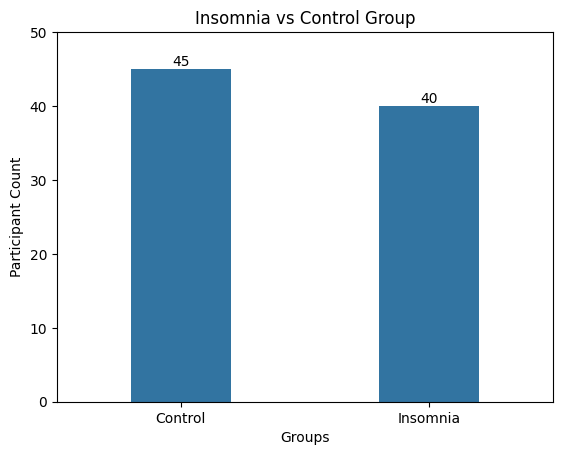

In [138]:
a = sns.countplot(data=df, x='Group', width=0.4) # countplot displays number of observations in each category 
a.bar_label(a.containers[0])

plt.ylim([0,50])

plt.ylabel('Participant Count')
plt.xlabel('Groups')
plt.title('Insomnia vs Control Group')

plt.show()

40 out of 95 participants have insomnia, while the rest are part of the control group. 

##### Q: What is the sex of each participant?  

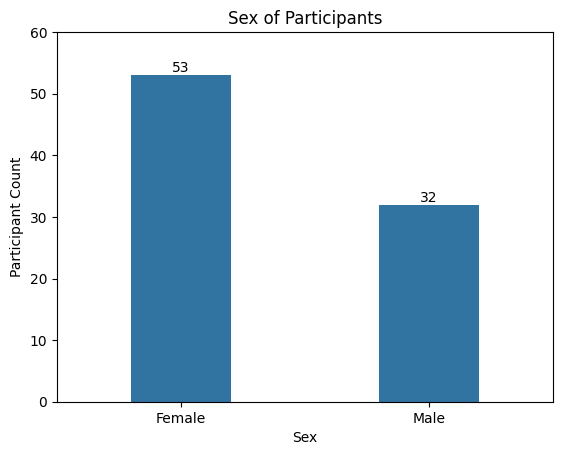

In [139]:
a = sns.countplot(data=df, x='Sex', width=0.4)
a.bar_label(a.containers[0])

plt.ylim([0, 60])

plt.ylabel('Participant Count')
plt.title('Sex of Participants')

plt.show()

##### Q: What is the distribution of age?

Median age is 18. All participants are over the age of 15. 

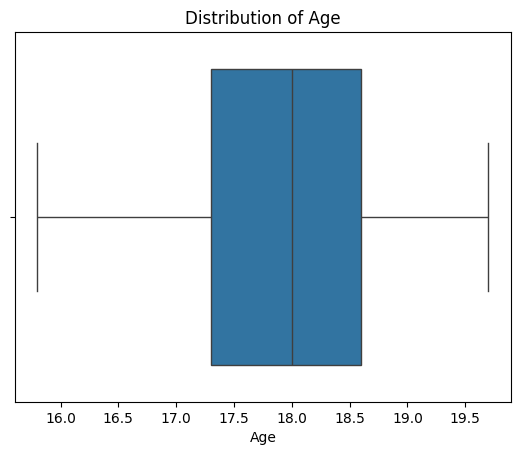

In [167]:
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.show()

##### Q: What is the distribution of anxiety before bedtime (GCTI_anxiety)? 

(Glasgow content of thoughts inventory)

The higher the score the greater the intrusiveness and frequency of dysfunctional thoughts at bedtime 

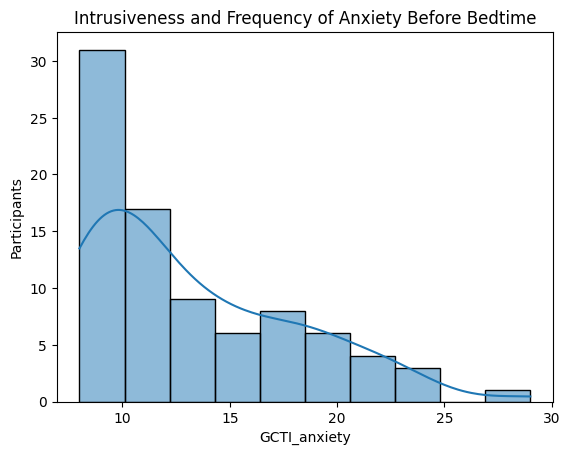

In [149]:
sns.histplot(df['GCTI_anxiety'], bins=10, kde=True)

plt.ylabel('Participants')
plt.title('Intrusiveness and Frequency of Anxiety Before Bedtime')

plt.show()

You can see this is right-skewed data. 

Here the distribution tells us that most participants have less anxiety before bedtime and the anxiety of participants before bedtime increases as we move to the right.

In [ ]:
res = stats.skewtest(df['GCTI_anxiety'])
print(res.statistic)

if res.statistic > 0:
    print("The 'GCTI_anxiety' distribution is right-skewed.")
elif res.statistic < 0:
    print("The 'GCTI_anxiety' distribution is left-skewed.")
else:
    print("The 'GCTI_anxiety' distribution is approximately symmetric.")

3.2880925219626644
The 'GCTI_anxiety' distribution is right-skewed.


##### Q: What is the gender distribution among those with versus without insomnia? 

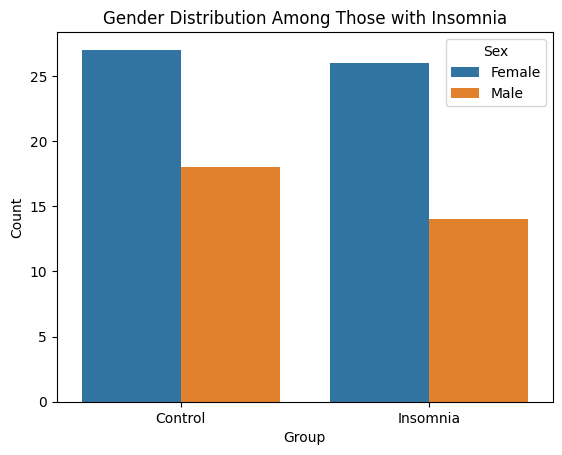

In [ ]:
sns.countplot(x='Group', hue='Sex', data=df)

plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Gender Distribution Among Those with Insomnia')

plt.legend(title='Sex', loc='upper right')

plt.show()

The amount of females with insomnia is about the same, while the amount of males with insomnia is lower than the control group. 

##### - Let's explore the stress domain related to insomnia disorder. 

1. Under the **stress domain** falls the ASQ (Adolescent Stress Questionairre) and PSRS (Percieved Stress Reactivity Scale) variables. 

* ASQ measures 10 different adolescent-specific stress components or domains: home life, school attendance, school performance, peer pressure, emerging adult responsibility, school/leisure conflict, romantic relationships, teacher interaction, future uncertainty, and financial pressures. 

* 5-point Likert-type scale answers ( E.g., “Keeping up with schoolwork”. )

    1 = Not at all stressful (or is irrelevant to me)

    2 = A little stressful

    3 = Moderately stressful

    4 = Quite stressful

    5 = Very stressful

* Scale scores were calculated by **summation of items**.

In [168]:
# Create a new column to store the names of columns where the word is found
varis['ASQ_columns'] = varis.apply(lambda row: ', '.join([col for col in varis.columns if str(row[col]).lower().find('ASQ'.lower()) != -1]), axis=1)

# Filter rows where the word is found
filtered_varis = varis[varis['ASQ_columns'] != '']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

filtered_varis[['ASQ_columns']]


,ASQ_columns
0,"asq_home, asq_school, asq_attendance, asq_romantic, asq_peer, asq_teacher, asq_future, asq_leisure, asq_finance, asq_responsibility, casq_total, casq_sleepy, casq_alert"


In [ ]:
varis['casq_total']

0    Total CASQ Score (Cleveland Adolescent Sleepiness Questionnaire)
Name: casq_total, dtype: object

!! how to remove 'found_in_columns' from vari in new col 

In [170]:
# Exclude columns starting with 'c'
excluded_columns = [col for col in varis.columns if not col.startswith('c')]
x = varis[excluded_columns]

x['ASQ_columns'] = x.apply(lambda row: ', '.join([col for col in x.columns if 'ASQ' in str(row[col]).upper()]), axis=1)

filtered_varis = x[x['ASQ_columns'] != '']

# Display the result
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

print(filtered_varis[['ASQ_columns']])

0                                                                                                                                       ASQ_columns
0  asq_home, asq_school, asq_attendance, asq_romantic, asq_peer, asq_teacher, asq_future, asq_leisure, asq_finance, asq_responsibility, ASQ_columns


/var/folders/tv/g7lzdqdd4n319yshd18pd2h40000gn/T/ipykernel_1772/1160595333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['ASQ_columns'] = x.apply(lambda row: ', '.join([col for col in x.columns if 'ASQ' in str(row[col]).upper()]), axis=1)


In [ ]:
df['asq_home'].head()

0    13
1    15
2    19
3    12
4    26
Name: asq_home, dtype: int64

##### Q: How stressful is home for each participant? 

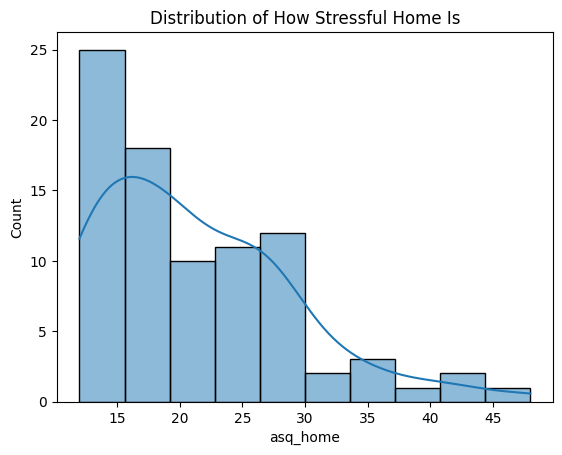

In [173]:
sns.histplot(df['asq_home'], bins=10, kde=True)
plt.title('Distribution of How Stressful Home Is')
plt.show()

The distribution of how stressful home is for adolescents is rightly skewed. Home is not very stressful for a majority of the participants. 

##### Q: Do participants with insomnia feel more stress at home than the control group? 

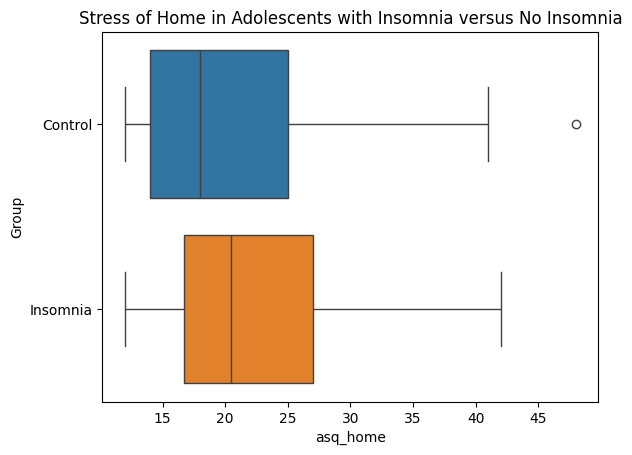

In [ ]:
sns.boxplot(x='asq_home', y='Group', data=df, hue='Group')

plt.title('Stress of Home in Adolescents with Insomnia versus No Insomnia')

plt.show()

About the same variability; insomnia group has slightly higher stress average. 

##### Q: Which factor causes the most vs least stress in the participants? 

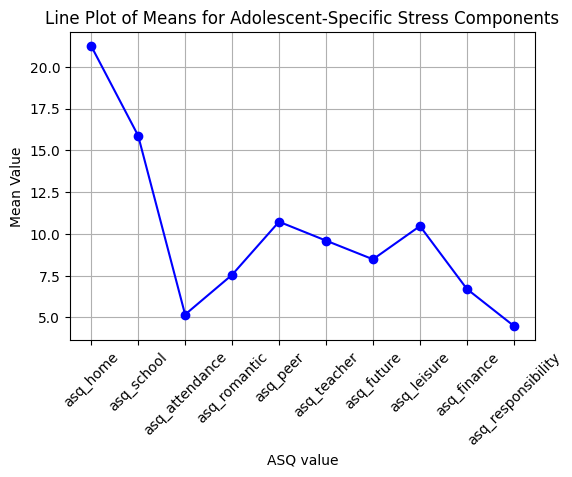

In [ ]:
# Specify the columns you want to include
selected_columns = ['asq_home', 'asq_school', 'asq_attendance', 'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure', 'asq_finance', 'asq_responsibility']

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate the mean for each selected column
means = selected_df.mean()

# Create a line plot
plt.figure(figsize=(6, 4))
plt.plot(means.index, means.values, marker='o', linestyle='-', color='b')
plt.title('Line Plot of Means for Adolescent-Specific Stress Components')
plt.xlabel('ASQ value')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Home-life seems the most stressful while emerging adult responsibility is the least stressful. 

##### *Q1: Which factor causes the most vs least stress in participants with insomnia versus without? 

!! below doesnt show all 10 columns or specify which group variable represents which line. 

<Figure size 1200x800 with 0 Axes>

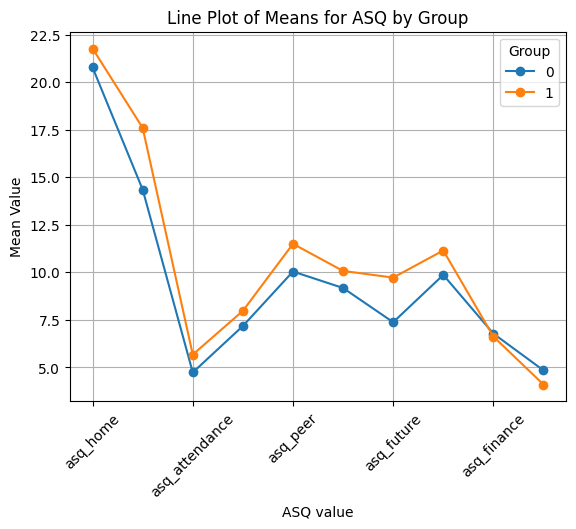

In [ ]:
# Specify the columns you want to include
selected_columns = ['asq_home', 'asq_school', 'asq_attendance', 'asq_romantic', 'asq_peer', 'asq_teacher', 'asq_future', 'asq_leisure', 'asq_finance', 'asq_responsibility', 'Group']

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Group by 'Group' and calculate the mean for each group
grouped_means = selected_df.groupby('Group').mean()

# Transpose the DataFrame for easy plotting
transposed_means = grouped_means.transpose()

# Create a line plot
plt.figure(figsize=(12, 8))
transposed_means.plot(marker='o', linestyle='-')
plt.title('Line Plot of Means for ASQ by Group')
plt.xlabel('ASQ value')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.grid(True)
plt.show()

* PSRS measures typical stress responses to different generalized situations (reactivity to social evaluation, reactivity to failure, reactivity to social conflicts, reactivity to work overload, and prolonged reactivity).

* It is a 23-item questionnaire with 5 subscales and 1 overall scale. Each item presents a potentially stressful stimulus (e.g. ‘When I speak in front of other peoples.’) and offers a choice of three response options for the participant to choose from (e.g. ‘I often get very nervous, ‘I often get somewhat nervous’ or ‘In general, I stay calm’). 

* Responses are coded on a scale of zero to two, with the answer representing the least reactivity scoring zero, and the answer representing the most reactivity scoring two. The sum of the mean scores on each subscale indicates the **participant's total stress reactivity**.

In [ ]:
varis['found_in_columns'] = varis.apply(lambda row: ', '.join([col for col in varis.columns if str(row[col]).lower().find('PSRS'.lower()) != -1]), axis=1)

filtered_varis = varis[varis['found_in_columns'] != '']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

print(filtered_varis[['found_in_columns']])


0                                                                found_in_columns
0  PSRS_PrR, PSRS_RWO, PSRS_RSC, PSRS_FRa, PSRS_RSE, PSRS_total, found_in_columns


##### Q: Which factor causes the highest vs lowest stress response in participants? 

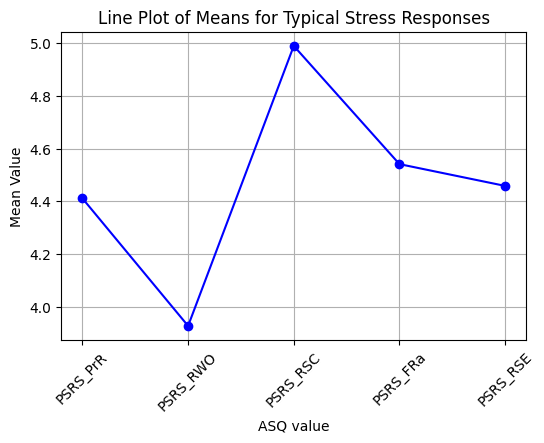

In [ ]:
# Specify the columns you want to include
selected_columns = ['PSRS_PrR', 'PSRS_RWO', 'PSRS_RSC', 'PSRS_FRa', 'PSRS_RSE']

# Filter the DataFrame to include only the selected columns
selected_df = df[selected_columns]

# Calculate the mean for each selected column
means = selected_df.mean()

plt.figure(figsize=(6, 4))

plt.plot(means.index, means.values, marker='o', linestyle='-', color='b')

plt.title('Means for Typical Stress Responses')
plt.xlabel('ASQ value')
plt.ylabel('Mean Value')

plt.xticks(rotation=45)

plt.grid(True)

plt.show()

In [ ]:
print(varis['PSRS_RSC'])
print(varis['PSRS_RWO'])

0    PSRS Reactivity to Social Conflict (RSC) (Perc...
Name: PSRS_RSC, dtype: object
0    PSRS Reactivity to Work Overload (RWO) (Percei...
Name: PSRS_RWO, dtype: object


It seems participants get the most nervous when they have a social conflict, and the least when they have a work overload. 

##### *Q: Which factor causes the highest vs lowest stress response in participants with insomnia vs without? 

! 

##### Total Stress Reactivity in Adolescents vs Insomnia

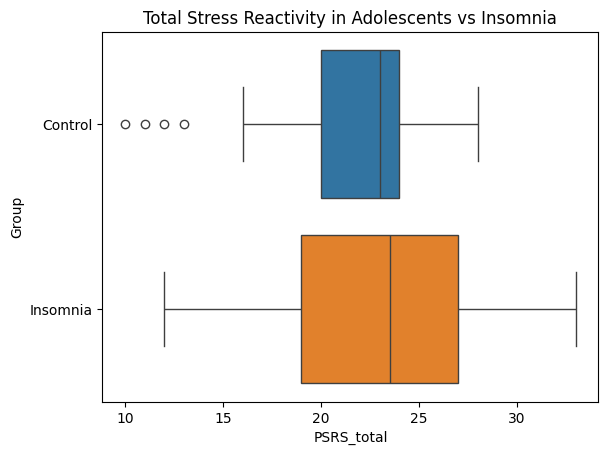

In [ ]:
sns.boxplot(x='PSRS_total', y='Group', data=df, hue='Group')

plt.title('Total Stress Reactivity in Adolescents vs Insomnia')

plt.show()

### Conclusions 

### Reflection / limitations 